In [1]:
### imports
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import os
from google.colab import files
from matplotlib import gridspec

with open('billboard_lyrics_1964-2015.csv') as f:
    print(f)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<_io.TextIOWrapper name='billboard_lyrics_1964-2015.csv' mode='r' encoding='UTF-8'>


# New Section

In [2]:
### loading dataset
df = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding = "ISO-8859-1")
df.head(101)

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
...,...,...,...,...,...,...
96,97,im a fool,dino desi billy,1965,NaN,NaN
97,98,the boy from new york city,the ad libs,1965,oo ah oo ah oo oo kitty tell us about the boy ...,3.0
98,99,keep searchin well follow the sun,del shannon,1965,no one will understand what ive gotta do ive ...,1.0
99,100,how sweet it is to be loved by you,marvin gaye,1965,how sweet it is to be loved by you yes baby h...,1.0


In [3]:
type(df.Lyrics[0])

str

In [4]:
### Verifying our data has no NAs and that all data we care about is accounted for
print(f'Years: {min(df.Year)} - {max(df.Year)}')
print(f'Rankings: {min(df.Rank)} - {max(df.Rank)}')
print(f'NA values:')
print(f'{df.isna().sum()}')


Years: 1965 - 2015
Rankings: 1 - 100
NA values:
Rank        0
Song        0
Artist      0
Year        0
Lyrics    187
Source    187
dtype: int64


In [5]:
### Looks like we didn't lose too many songs per year besides maybe 1971 for there to be a problem
df = df.dropna()
# df["Year"].value_counts()

In [6]:
### Lower-casing everything and removing useless words ("stop words")
df['Lyrics'] = df['Lyrics'].str.lower()

stops = stopwords.words('english')
stops = stops + ['dont', 'im', 'youre', 'ill', 'gonna', 'aint', 'ive', 'youll', 'wont', 'na', 'wan']

pat = r'\b(?:{})\b'.format('|'.join(stops))
df['lyrics - stopwords'] = df['Lyrics'].str.replace(pat, '')
df['lyrics - stopwords'] = df['lyrics - stopwords'].str.replace(r'\s+', ' ')


<ipython-input-6-f41d78d704ed>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lyrics - stopwords'] = df['Lyrics'].str.replace(pat, '')
<ipython-input-6-f41d78d704ed>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['lyrics - stopwords'] = df['lyrics - stopwords'].str.replace(r'\s+', ' ')


In [7]:
### Removing punctuation
df["lyrics - stopwords"] = df['lyrics - stopwords'].str.replace('[^\w\s]', '')
df['lyrics - stopwords'] = df['lyrics - stopwords'].str.upper()

<ipython-input-7-88c61cb821fc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["lyrics - stopwords"] = df['lyrics - stopwords'].str.replace('[^\w\s]', '')


In [8]:
### Tokenizing the filtered lyrics
df["tokened"] = df["lyrics - stopwords"].apply(lambda x: nltk.word_tokenize(str(x)))
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,lyrics - stopwords,tokened
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,SAM SHAM MISCELLANEOUS WOOLY BULLY WOOLY BULLY...,"[SAM, SHAM, MISCELLANEOUS, WOOLY, BULLY, WOOLY..."
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,SUGAR PIE HONEY BUNCH KNOW LOVE CANT HELP LOV...,"[SUGAR, PIE, HONEY, BUNCH, KNOW, LOVE, CANT, H..."
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,,[]
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,WOKE MORNING MIND MIND GOT TROUBLES WHOAOH GO...,"[WOKE, MORNING, MIND, MIND, GOT, TROUBLES, WHO..."
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,NEVER CLOSE EYES ANYMORE KISS LIPS THERES TEN...,"[NEVER, CLOSE, EYES, ANYMORE, KISS, LIPS, THER..."


Text(0.5, 1.0, 'Twenty Most Popular Words In Top 100 Songs From 1965 to 2015')

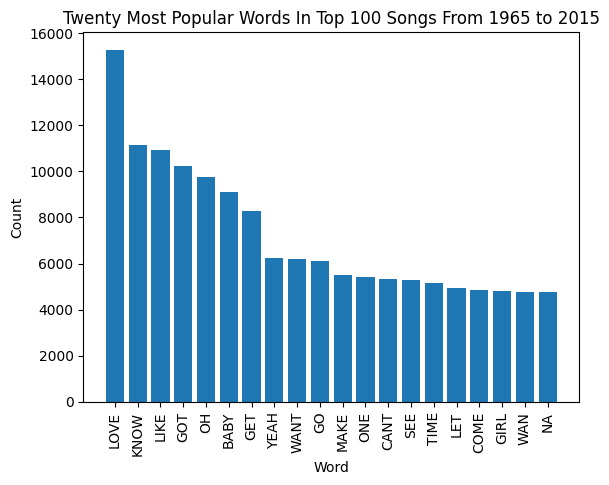

In [9]:
### All unique words and their counts
unique_words = pd.Series(np.sum(df["tokened"])).value_counts()
unique_words
plt.bar(unique_words.index[:20], unique_words[:20])
plt.xticks(rotation=90)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title('Twenty Most Popular Words In Top 100 Songs From 1965 to 2015')


In [10]:
### Finding top words for every year
years_top_words = {}
for year in range(1965, 2016):
  df_year = df[df["Year"] == year]
  # years_top_words[year] = pd.Series(np.sum(df_year["tokened"])).value_counts()[:5]
  years_top_words[year] = pd.Series(np.sum(df_year["tokened"])).value_counts()

In [11]:
### Getting counts of all the top n words per year for every year, 0 if DNE
n = 5


years_words_df = pd.DataFrame.from_dict(years_top_words)
years_words_df = years_words_df.fillna(0)

top_n_words = []
for year in range(1965, 2016):
  top_n_words += years_words_df[year].sort_values(ascending=False).index[:n].tolist()

top_n_words = set(top_n_words)

years_words_df["words"] = years_words_df.index

only_top_words = years_words_df[years_words_df["words"].isin(top_n_words)]
only_top_words = only_top_words.drop("words", axis=1).T
only_top_words.head()

,BABY,CANT,COME,DANCE,FEEL,GET,GIRL,GO,GOOD,GOT,...,LIKE,LOVE,MAKE,NIGHT,OH,ONE,SAY,TIME,WANT,YEAH
1965,166.0,56.0,99.0,5.0,35.0,51.0,48.0,95.0,31.0,129.0,...,70.0,265.0,40.0,31.0,69.0,45.0,66.0,72.0,68.0,77.0
1966,131.0,71.0,62.0,17.0,37.0,47.0,71.0,58.0,92.0,67.0,...,58.0,159.0,41.0,45.0,81.0,48.0,42.0,60.0,32.0,43.0
1967,158.0,46.0,53.0,17.0,18.0,93.0,83.0,49.0,35.0,91.0,...,47.0,309.0,14.0,24.0,155.0,40.0,38.0,39.0,45.0,63.0
1968,151.0,28.0,112.0,22.0,30.0,65.0,48.0,57.0,23.0,98.0,...,105.0,203.0,54.0,14.0,110.0,29.0,93.0,79.0,56.0,121.0
1969,177.0,83.0,82.0,3.0,27.0,86.0,72.0,46.0,35.0,111.0,...,53.0,240.0,68.0,45.0,131.0,86.0,61.0,55.0,44.0,83.0


In [12]:
### getting top 5 words in dataframe over years
top_5 = only_top_words.filter(unique_words[:5].index)
years = np.arange(1965, 2016)

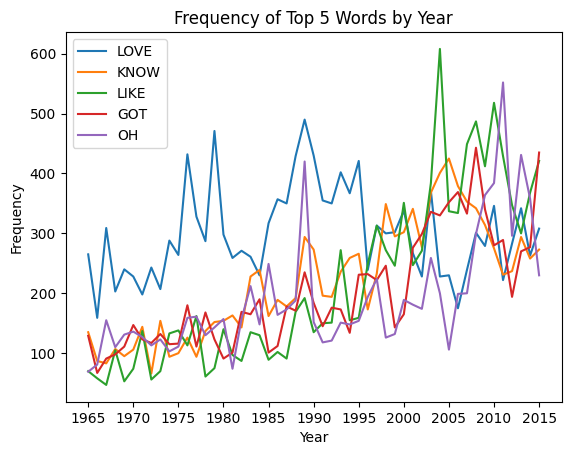

In [13]:
##########################################################################
### Seeing if there could be a time-related trend among some top words ###
##########################################################################

### plotting only top 5 words
plt.plot(top_5);
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.xticks(np.arange(1965, 2020, 5))
plt.title("Frequency of Top 5 Words by Year")
plt.legend(top_5.columns, loc="best")

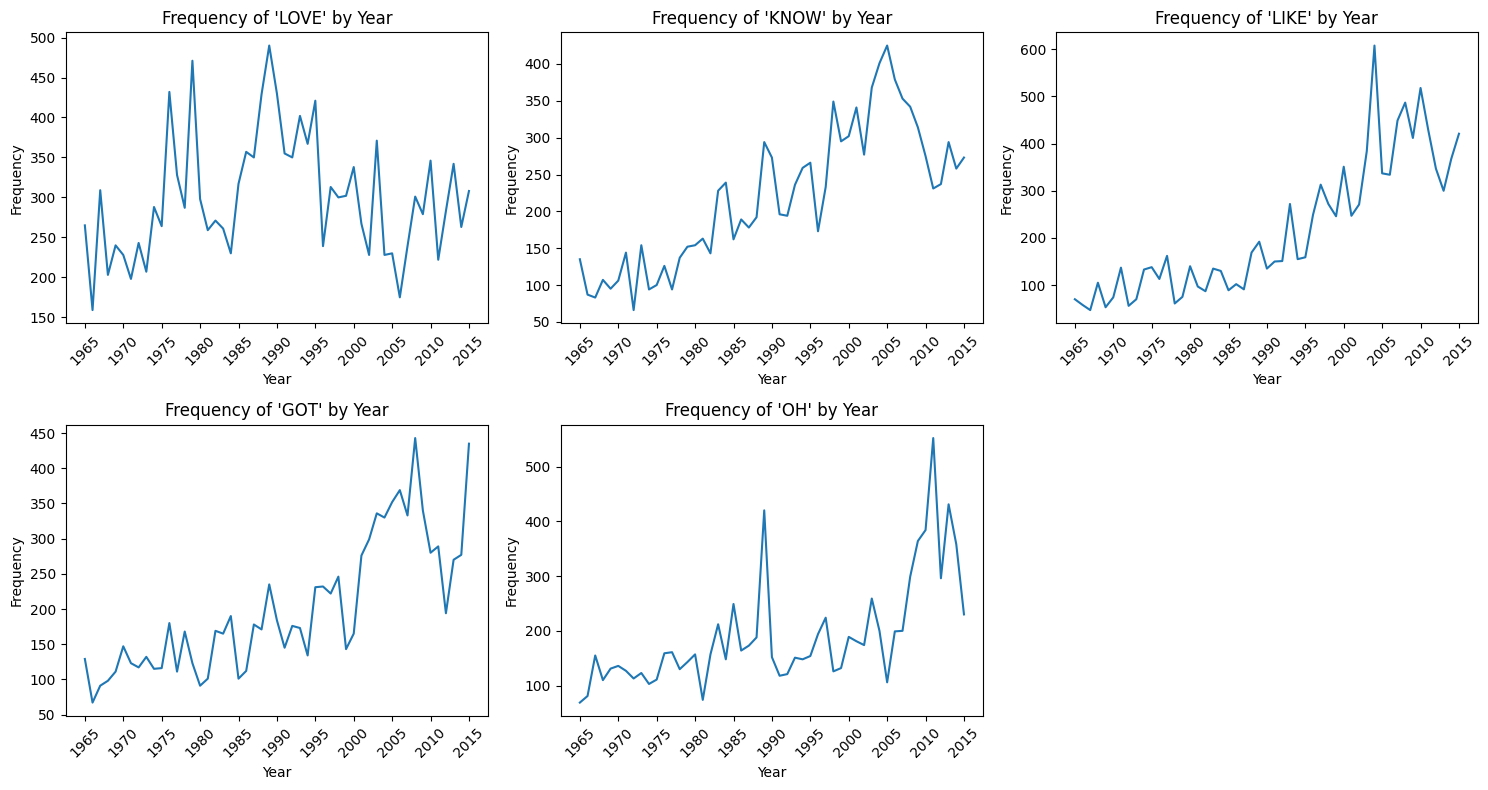

In [14]:
### Plotting 5 plots together for ease of viewing and usage on the doc
### Don't run this cell more than once, I think it'll like save copies over and over again
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()
for i, col in enumerate(top_5.columns):
    ax = axs[i]
    ax.plot(top_5[col])
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Year")
    ax.set_title(f"Frequency of '{col}' by Year")
    ax.set_xticks(np.arange(1965, 2020, 5))
    ax.set_xticklabels(np.arange(1965, 2020, 5), rotation=45)
for i in range(len(axs)):
    if i >= 5:
        axs[i].axis('off')
plt.tight_layout()
# plt.savefig('top5_words.png')
# files.download('top5_words.png')

<ipython-input-15-b1276223017c>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(decade[1].index, rotation=90)


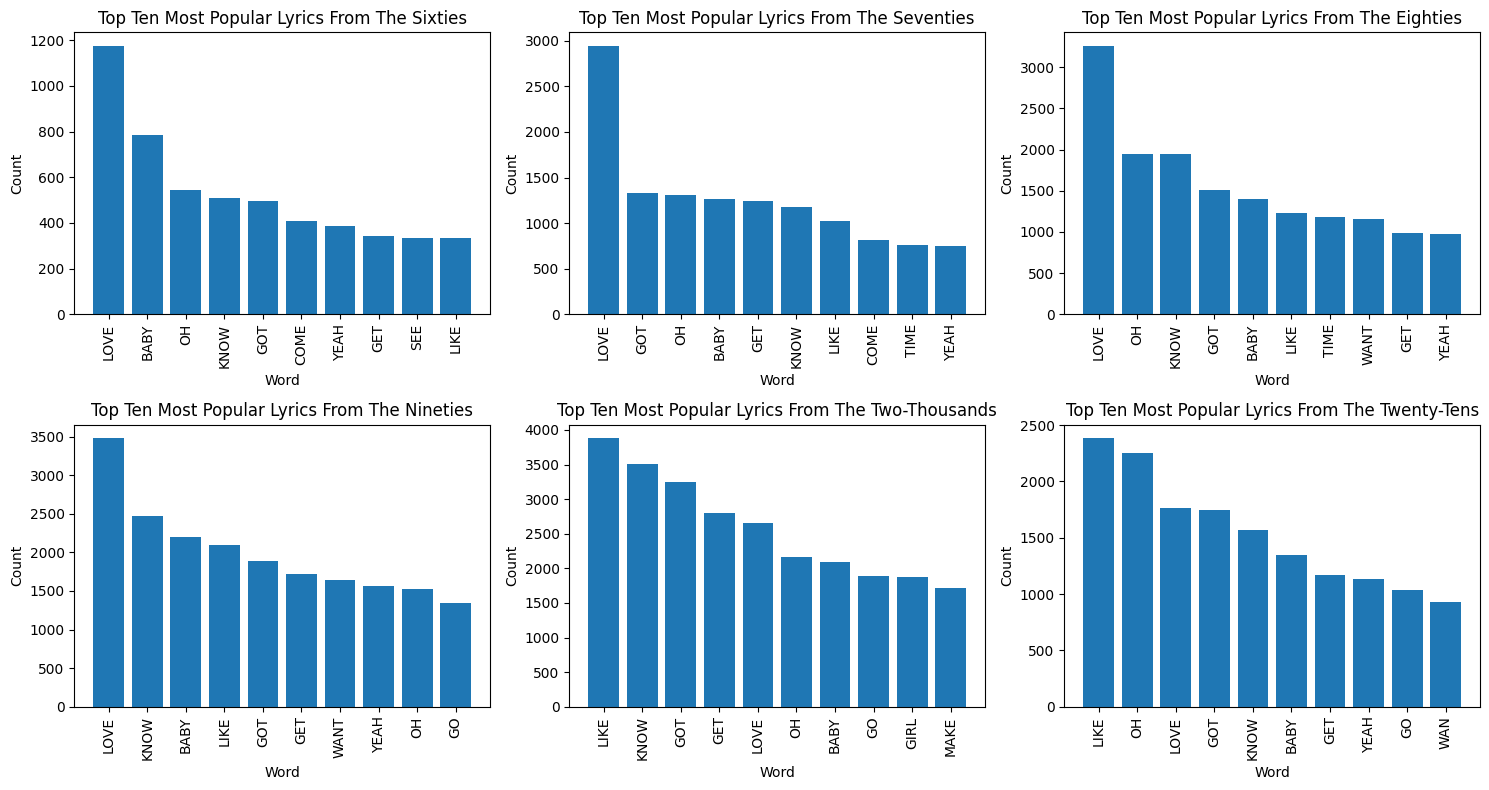

In [15]:
### CAUTION: ONLY RUN THIS CELL ONCE, IT WILL SAVE MULTIPLE COPIES INTO YOUR DOWNLOADS FOLDER

### Builds dataframes for all six decades
sixties = df[df['Year'].isin(np.arange(1965, 1970))]
seventies = df[df['Year'].isin(np.arange(1970, 1980))]
eighties = df[df['Year'].isin(np.arange(1980, 1990))]
nineties = df[df['Year'].isin(np.arange(1990, 2000))]
two_thousands = df[df['Year'].isin(np.arange(2000, 2010))]
twenty_tens = df[df['Year'].isin(np.arange(2010, 2016))]

years_dfs = [sixties, seventies, eighties, nineties, two_thousands, twenty_tens]
yrs_name = ['Sixties', 'Seventies', 'Eighties', 'Nineties', 'Two-Thousands', 'Twenty-Tens']

### Evaluate each decade's words
decade_unique_words = []
for year, yr in zip(years_dfs, yrs_name):
  decade_unique_words.append((yr, pd.Series(np.sum(year["tokened"])).value_counts()))

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

### Prints six plots of most popular lyrics
for i, decade in enumerate(decade_unique_words):
    ax = axs[i]
    ax.bar(decade[1].index[:10], decade[1][:10])
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.set_title(f"Top Ten Most Popular Lyrics From The {decade[0]}")
    ax.set_xticklabels(decade[1].index, rotation=90)

plt.tight_layout()
# plt.savefig('top10_per_decade.png')
# files.download('top10_per_decade.png')

In [16]:
###############################################################################
### Seeing if there could be a time-related trend among repetition in songs ###
###############################################################################

# Defining repetition function
def repetition(lst):
  """Returns count of same word in song
  In: List of song lyrics
  Out: Int
  """
  words = {}

  for word in lst:
    if not (word in words.keys()):
      words[word] = 0
    else:
      words[word] += 1

  return sum(words.values())

In [17]:
### Getting average repetitions by year
df["repetition count"] = df["tokened"].apply(repetition)
reps_by_year = df[["Year", "repetition count"]].groupby("Year").agg(np.mean)
# df[["Year", "repetition count"]]
reps_by_year.head()

,repetition count
Year,
1965,49.042105
1966,45.347368
1967,43.979592
1968,53.096774
1969,49.956989


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

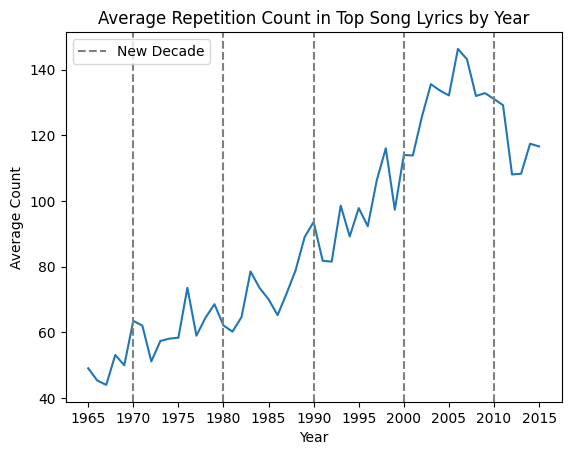

In [89]:
plt.plot(reps_by_year)
years_for_deriv_plot = [1970, 1980, 1990, 2000]
for deriv_yr in years_for_deriv_plot:
  plt.axvline(x=deriv_yr, color='grey', linestyle='--')
plt.axvline(x=2010, color='grey', linestyle='--', label='New Decade')
plt.ylabel("Average Count")
plt.xlabel("Year")
plt.title("Average Repetition Count in Top Song Lyrics by Year")
plt.xticks(np.arange(1965, 2020, 5))
plt.legend()
plt.savefig('avg_rep_count.png')
files.download('avg_rep_count.png')
# np.corrcoef(reps_by_year["repetition count"], years)

In [19]:
### Taking derivatives across the whole data set and the start to the max
print(f'The time derivative from 1965 - 2006: {(146.281250 - 49.042105) / 41}')
print(f'The time derivative from 1965 - 2015: {(116.591837 - 49.042105) / 50}')
deriv_60s = (49.956989 - 49.042105) / 5
deriv_70s = (68.557895 - 63.484536) / 10
deriv_80s = (89.000000 - 62.074468) / 10
deriv_90s = (97.329897 - 93.602041) / 10
deriv_00s = (132.824742 - 113.990000) / 10
deriv_10s = (116.591837 - 131.020202) / 5
deriv_overall = (116.591837 - 49.042105) / 50
deriv_gen_x = (68.557895 - 49.042105) / 14
deriv_gen_y = (89.191489 - 62.074468) / 14
deriv_gen_z = (108.061224 - 97.814433) / 17

deriv_df = pd.DataFrame(data={'Time Period':['Sixties',
                                        'Seventies',
                                        'Eighties',
                                        'Nineties',
                                        'Two-Thousands',
                                        'Twenty-Tens',
                                        'Overall',
                                        'Gen X',
                                        'Gen Y',
                                        'Gen Z'],
                              'Derivatives':[deriv_60s,
                                             deriv_70s,
                                             deriv_80s,
                                             deriv_90s,
                                             deriv_00s,
                                             deriv_10s,
                                             deriv_overall,
                                             deriv_gen_x,
                                             deriv_gen_y,
                                             deriv_gen_z]})
deriv_df

The time derivative from 1965 - 2006: 2.371686463414634
The time derivative from 1965 - 2015: 1.3509946400000001


,Time Period,Derivatives
0,Sixties,0.182977
1,Seventies,0.507336
2,Eighties,2.692553
3,Nineties,0.372786
4,Two-Thousands,1.883474
5,Twenty-Tens,-2.885673
6,Overall,1.350995
7,Gen X,1.393985
8,Gen Y,1.936930
9,Gen Z,0.602752


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

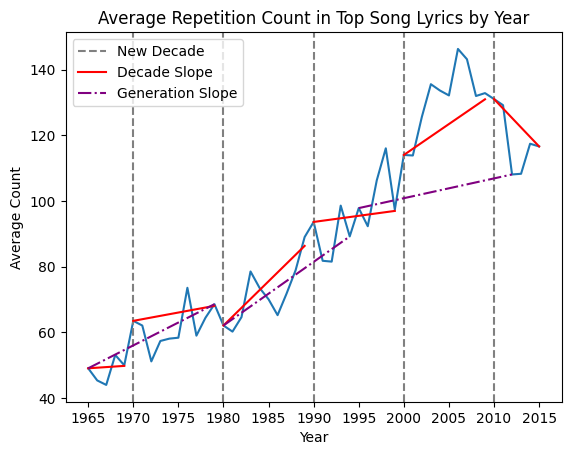

In [91]:
### Plotting derivatives
years_for_deriv_plot = [1970, 1980, 1990, 2000]
plt.plot(reps_by_year)
for deriv_yr in years_for_deriv_plot:
  plt.axvline(x=deriv_yr, color='grey', linestyle='--')
plt.axvline(x=2010, color='grey', linestyle='--', label='New Decade')

derivs_by_yr = [deriv_60s,
                deriv_70s,
                deriv_80s,
                deriv_90s,
                deriv_00s]
yrs_for_slope_plot = [(1965,1969),
                      (1970,1979),
                      (1980,1989),
                      (1990,1999),
                      (2000,2009)]
ys_for_slope_plot = [(49.042105,49.956989),
                     (63.484536,68.557895),
                     (62.074468,89.000000),
                     (93.602041,97.329897),
                     (113.990000,132.824742)]
for x, y, m in zip(yrs_for_slope_plot, ys_for_slope_plot, derivs_by_yr):
  intercept = y[0] - m * x[0]
  yrs_x = np.linspace(x[0], x[1], 10)
  yrs_y = m * yrs_x + intercept
  plt.plot(yrs_x, yrs_y, color='red')
temp_int = 131.020202 - deriv_10s * 2010
temp_x = np.linspace(2010,2015,10)
temp_y = deriv_10s * temp_x + temp_int
plt.plot(temp_x, temp_y, color='red', label='Decade Slope')


derivs_by_gen = [deriv_gen_x,
                 deriv_gen_y]
yrs_gen_slope_plot = [(1965,1979),
                      (1980,1994)]
ys_gen_slope_plot = [(49.042105,68.557895),
                     (62.074468,89.191489)]
for x, y, m in zip(yrs_gen_slope_plot, ys_gen_slope_plot, derivs_by_gen):
  intercept = y[0] - m * x[0]
  yrs_x = np.linspace(x[0], x[1], 10)
  yrs_y = m * yrs_x + intercept
  plt.plot(yrs_x, yrs_y, color='purple', linestyle='-.', label='')
ttemp_int = 97.814433 - deriv_gen_z * 1995
ttemp_x = np.linspace(1995,2012,10)
ttemp_y = deriv_gen_z * ttemp_x + ttemp_int
plt.plot(ttemp_x, ttemp_y, color='purple', linestyle='-.', label='Generation Slope')

plt.ylabel("Average Count")
plt.xlabel("Year")
plt.title("Average Repetition Count in Top Song Lyrics by Year")
plt.xticks(np.arange(1965, 2020, 5))
plt.legend(loc='upper left')

# np.corrcoef(reps_by_year["repetition count"], years)
plt.savefig('repetition_w_slopes.png')
files.download('repetition_w_slopes.png')

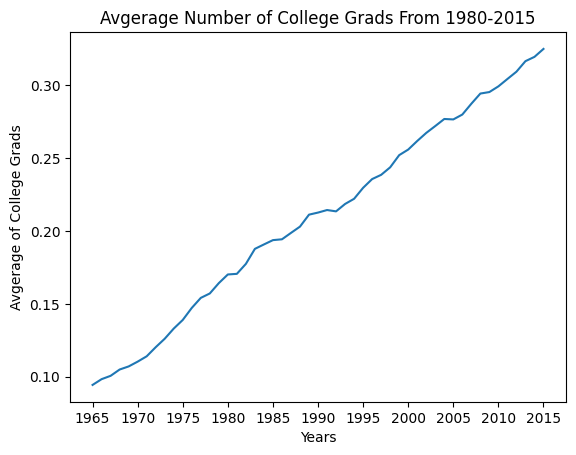

In [21]:
### Loading in Education Level Data
### This data comes from this website:
###       https://www.census.gov/data/tables/time-series/demo/educational-attainment/cps-historical-time-series.html
### But was originally found through this website:
###       https://www.statista.com/statistics/184272/educational-attainment-of-college-diploma-or-higher-by-gender/

education = pd.read_csv('education.csv')
for column in education.columns:
    education[column] = education[column].replace(',', '', regex=True).astype(float)

education['Avg College'] = education['College 4+ Years'] / education['Total Population']
plt.plot(education['Year'], education['Avg College'])
plt.xlabel('Years')
plt.ylabel('Avgerage of College Grads')
plt.title('Avgerage Number of College Grads From 1980-2015')
plt.xticks(np.arange(1965, 2020, 5));

In [22]:
###############################################################################
############################# SENTIMENT ANALYSIS ##############################
###############################################################################
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [23]:
df["Sentiment"] = df['Lyrics'].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head()

,Rank,Song,Artist,Year,Lyrics,Source,lyrics - stopwords,tokened,repetition count,Sentiment
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,SAM SHAM MISCELLANEOUS WOOLY BULLY WOOLY BULLY...,"[SAM, SHAM, MISCELLANEOUS, WOOLY, BULLY, WOOLY...",46,-0.9946
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,SUGAR PIE HONEY BUNCH KNOW LOVE CANT HELP LOV...,"[SUGAR, PIE, HONEY, BUNCH, KNOW, LOVE, CANT, H...",39,0.2624
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,,[],0,0.0000
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,WOKE MORNING MIND MIND GOT TROUBLES WHOAOH GO...,"[WOKE, MORNING, MIND, MIND, GOT, TROUBLES, WHO...",44,-0.9607
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,NEVER CLOSE EYES ANYMORE KISS LIPS THERES TEN...,"[NEVER, CLOSE, EYES, ANYMORE, KISS, LIPS, THER...",75,0.9958


In [24]:
### Getting average sentiment per year
sent_per_year = df[["Year", "Sentiment"]].groupby("Year").agg(np.mean)
# sent_per_year

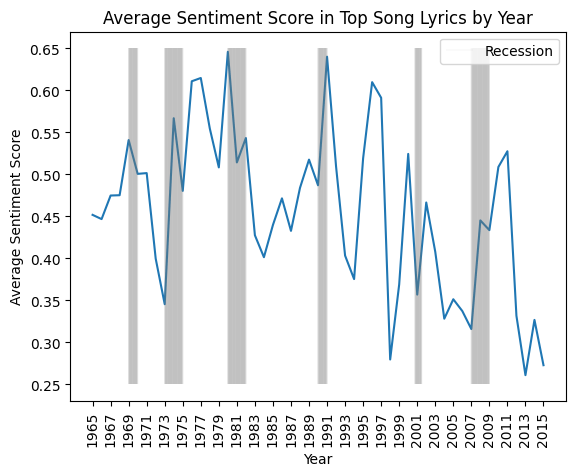

In [77]:
### Plotting the average sentiment over time
plt.plot(sent_per_year.index, sent_per_year["Sentiment"])
plt.ylabel("Average Sentiment Score")
plt.xlabel("Year")
plt.title("Average Sentiment Score in Top Song Lyrics by Year")
plt.xticks(np.arange(1965, 2016, 2), rotation=90)
np.corrcoef(sent_per_year["Sentiment"], years)

# 73-75
# 80-82
# 90-91
# 2001
# 2007-2009
# 2020


### First Recession
plt.vlines(x=np.arange(1969,1970,0.015), ymin=0.25,ymax=0.65, color='grey', alpha=0.04, label='Recession')
plt.vlines(x=np.arange(1973,1975,0.015), ymin=0.25,ymax=0.65, color='grey', alpha=0.04)
plt.vlines(x=np.arange(1980,1982,0.015), ymin=0.25,ymax=0.65, color='grey', alpha=0.04)
plt.vlines(x=np.arange(1990,1991,0.015), ymin=0.25,ymax=0.65, color='grey', alpha=0.04)
plt.vlines(x=np.arange(2000.75,2001.5,0.015), ymin=0.25,ymax=0.65, color='grey', alpha=0.04)
plt.vlines(x=np.arange(2007,2009,0.015), ymin=0.25,ymax=0.65, color='grey', alpha=0.04)
plt.legend()

**It appears that sentiment is positive (no negative values) across the board. Although the trend is downwards over time. Additionally, there are some clear downward and upward spikes. The reasons for these can be speculated. World events like the Vietnam War, Clinton being impeached, 9/11, etc. could have been influences, but it is hard to say for sure.**

In [61]:
### Trying to see if it's correlated with sentiment analysis of news coverage
news = pd.read_csv("news_sentiment_data.csv")
news["date"] = pd.to_datetime(news["date"]).dt.year
news_sent_per_year = news.groupby("date").agg(np.mean)
# news_sent_per_year

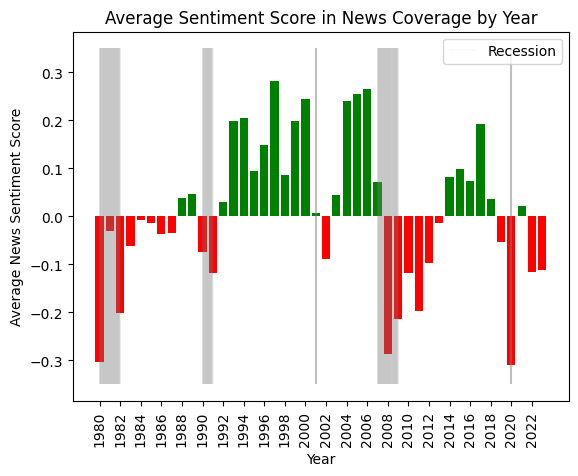

In [79]:
### Plotting the average news sentiment over time
plt.bar(news_sent_per_year.index, news_sent_per_year["News Sentiment"],
        color=np.where(news_sent_per_year["News Sentiment"] < 0, 'red', 'green'))
plt.ylabel("Average News Sentiment Score")
plt.xlabel("Year")
plt.title("Average Sentiment Score in News Coverage by Year")
plt.xticks(np.arange(1980, 2023, 2), rotation=90)

plt.vlines(x=np.arange(1980,1982,0.015), ymin=-0.35,ymax=0.35, color='grey', alpha=0.04, label='Recession')
plt.vlines(x=np.arange(1990,1991,0.015), ymin=-0.35,ymax=0.35, color='grey', alpha=0.04)
plt.vlines(x=2001, ymin=-0.35,ymax=0.35, color='grey', alpha=0.5)
plt.vlines(x=np.arange(2007,2009,0.015), ymin=-0.35,ymax=0.35, color='grey', alpha=0.04)
plt.vlines(x=2020, ymin=-0.35,ymax=0.35, color='grey', alpha=0.5)
plt.legend()

In [129]:
### Getting only the years in the intersection between the two datasets
sent_in_years = sent_per_year[sent_per_year.index >= 1980]
news_sent_in_years = news_sent_per_year[news_sent_per_year.index <= 2015]

array([[ 1.        , -0.33056974],
       [-0.33056974,  1.        ]])

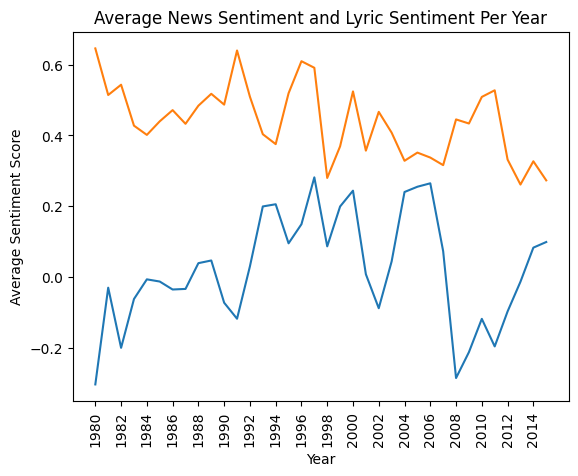

In [130]:
### Plotting and seeing if there is a correlation
plt.plot(news_sent_in_years.index, news_sent_in_years["News Sentiment"])
plt.plot(sent_in_years.index, sent_in_years["Sentiment"])
plt.ylabel("Average Sentiment Score")
plt.xlabel("Year")
plt.title("Average News Sentiment and Lyric Sentiment Per Year")
plt.xticks(np.arange(1980, 2016, 2), rotation=90)
np.corrcoef(news_sent_in_years["News Sentiment"], sent_in_years["Sentiment"])

This is interesting. These measures appear to be negatively correlated.

array([[1.        , 0.23392633],
       [0.23392633, 1.        ]])

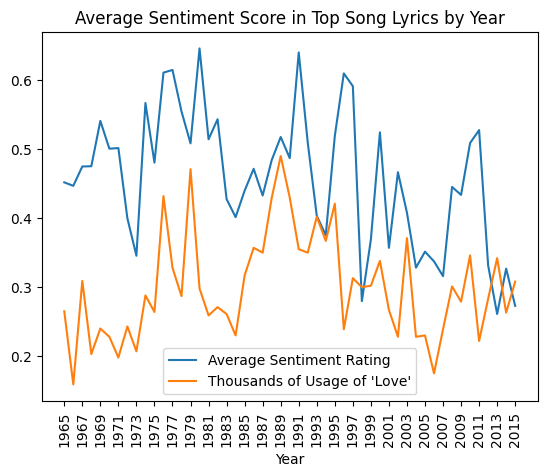

In [131]:
### For fun let's see if sentiment and love usage are correlated
plt.plot(sent_per_year.index, sent_per_year["Sentiment"], label="Average Sentiment Rating")
#Dividing by 1000 to be able to see the lines close to each other
plt.plot(top_5[[top_5.columns[0]]] / 1000, label="Thousands of Usage of 'Love'");
plt.legend()
plt.xlabel("Year")
plt.title("Average Sentiment Score in Top Song Lyrics by Year")
plt.xticks(np.arange(1965, 2016, 2), rotation=90)
np.corrcoef(sent_per_year["Sentiment"], top_5[top_5.columns[0]])